In [1]:
from astropy.io import fits
import pylab

p = fits.open('hlsp_candels_hst_wfc3_cos-tot-multiband_f160w_v1-1photom_sfr_mass_specbasiscoeffs_cat_20210430a.fits')

tab = p[1]

In [2]:

def plot(col1, col2, xlim, ylim, mask=True, name_suff=''):

    pylab.clf()

    pylab.scatter(tab.data[col1][mask], tab.data[col2][mask], s=0.1)

    if xlim is not None:
        pylab.xlim(xlim)

    if ylim is not None:
        pylab.ylim(ylim)

    pylab.xlabel(col1)

    pylab.ylabel(col2)

    pylab.savefig('./plots/%s_%s%s.pdf' % (col1, col2, name_suff))

    pylab.show()

In [16]:
tab.columns

ColDefs(
    name = 'pind'; format = 'K'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'id'; format = '10A'
    name = 'u_LSST'; format = 'E'
    name = 'du'; format = 'E'
    name = 'g_LSST'; format = 'E'
    name = 'dg'; format = 'E'
    name = 'r_LSST'; format = 'E'
    name = 'dr'; format = 'E'
    name = 'i_LSST'; format = 'E'
    name = 'di'; format = 'E'
    name = 'z_LSST'; format = 'E'
    name = 'dz'; format = 'E'
    name = 'y_WFIRST'; format = 'E'
    name = 'dy'; format = 'E'
    name = 'j_WFIRST'; format = 'E'
    name = 'dj'; format = 'E'
    name = 'h_WFIRST'; format = 'E'
    name = 'dh'; format = 'E'
    name = 'F184W_WFIRST'; format = 'E'
    name = 'df184w'; format = 'E'
    name = 'k'; format = 'E'
    name = 'dk'; format = 'E'
    name = 'redshift'; format = 'E'
    name = 'F160Wmag'; format = 'E'
    name = 'fwhm'; format = 'E'
    name = 'logmass'; format = 'D'
    name = 'logsfr'; format = 'D'
    name = 'SPECBASIS00'; format = 'D'
   

In [3]:
def slices(tab,zl,zu):
    
    mask1 = (tab.data['redshift'] > zl)
    
    mask2 = (tab.data['redshift'] < zu)
    
    mask = mask1 * mask2
    
    return mask

In [4]:
def zrange_plot(col1, col2, zl, zu, xlim, ylim):

    mask = slices(tab, zl, zu)

    plot(col1,col2,xlim,ylim,mask, name_suff='_%f_%f' % (zl,zu))

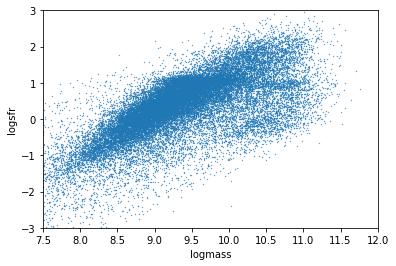

In [18]:
zrange_plot('logmass', 'logsfr', 0, 2., [7.5,12],[-3,3])

In [15]:
''' construct sample '''

mask_mass = (tab.data['logmass'] > 6) * (tab.data['logmass'] < 13)
mask_z = (tab.data['redshift'] > 0) * (tab.data['redshift'] < 4)
mask_sfr = (tab.data['logsfr'] > -3) * (tab.data['logsfr'] < 3)

mask = mask_z * mask_mass * mask_sfr

import numpy as np

indices = np.arange(tab.data.shape[0])

indices_masked = indices[mask]

masses_masked = tab.data['logmass'][mask]

sfrs_masked = tab.data['logsfr'][mask]

z_masked = tab.data['redshift'][mask]





mass_zip = list(zip(masses_masked,indices_masked))

sfrs_zip = list(zip(sfrs_masked,indices_masked))

z_zip = list(zip(z_masked,indices_masked))


mass_zip.sort()

sfrs_zip.sort()

z_zip.sort()


num = len(indices_masked)

indices_mass_hack_day = []

indices_sfr_hack_day = []

indices_z_hack_day = []


for percentile in np.arange(0,1,1./34):

    indices_mass_hack_day.append(mass_zip[int(percentile*num)][1])

    indices_sfr_hack_day.append(sfrs_zip[int(percentile*num)][1])

    indices_z_hack_day.append(z_zip[int(percentile*num)][1])

print(indices_mass_hack_day)
print(indices_sfr_hack_day)
print(indices_z_hack_day)

for ind in indices_mass_hack_day:
    print(tab.data['logmass'][ind])


indices_hack_day = indices_mass_hack_day[:-1] + indices_sfr_hack_day[:-1] + indices_z_hack_day

pind = [tab.data['pind'][ind] for ind in indices_hack_day]

np.savetxt('pind_indices_hack_day.txt', pind, fmt='%d')

[25306, 1067, 2940, 6313, 20119, 35307, 18147, 28714, 14246, 8779, 27929, 22033, 19920, 23580, 780, 27456, 103, 35130, 10659, 21429, 26126, 4975, 24093, 5386, 20798, 6792, 9664, 26173, 11886, 30811, 26492, 27847, 20772, 23733]
[30272, 15269, 24707, 33696, 30190, 18877, 27887, 31240, 5087, 16574, 4567, 23147, 28505, 4964, 13068, 22862, 5267, 25774, 15285, 28801, 6123, 28098, 18716, 13320, 22253, 15584, 37742, 20072, 37904, 35716, 7138, 29247, 21625, 28457]
[12759, 36351, 33026, 11802, 32959, 7470, 6154, 36187, 18721, 22328, 34182, 31560, 19365, 28489, 21017, 30601, 25104, 18470, 14070, 7334, 29256, 2916, 23877, 24555, 15066, 35534, 30604, 21957, 10704, 8338, 37393, 27279, 3719, 26926]
6.004321575164795
7.826722621917725
8.193124771118164
8.390934944152832
8.53667
8.6425
8.73513
8.822821617126465
8.89476
8.9627
9.029383659362793
9.0882
9.14389
9.198657035827637
9.25527286529541
9.309630393981934
9.363612174987793
9.41628
9.4721
9.52977
9.585460662841797
9.646403312683105
9.71096324920654

In [ ]:
print('hi')